# 과제#1. 더반찬 주문량 예측

## 0. 환경준비

### 0.1 Import

In [171]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  

### 0.2 Data Loading

In [174]:
# raw data 로딩 
raw_data = pd.read_csv(r'C:\Users\user\Desktop\intern.csv')
raw_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
0,0,202201095519105,2022-01-11 00:00:00,2022-01-09 12:26:10,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,충청북도 증평군 증평읍 송산로 11 (지평더웰아파트),6900,569.0,6331
1,1,202201105522898,2022-01-11 00:00:00,2022-01-10 10:35:49,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,서울특별시 강남구 논현로85길 52 (역삼동),6900,177.0,6723
2,2,202201115527172,2022-01-12 00:00:00,2022-01-11 11:38:32,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,"서울특별시 송파구 올림픽로4길 42 (잠실동, 우성아파트)",6900,221.0,6679
3,3,202201105523467,2022-01-12 00:00:00,2022-01-10 13:21:51,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,강원도 속초시 도리원길 11-14 (노학동),6900,128.0,6772
4,4,202201105522519,2022-01-11 00:00:00,2022-01-10 08:16:21,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,"경기도 용인시 수지구 동천로 64 (동천동, 동천마을동문굿모닝힐5차아파트)",6900,157.0,6743


In [453]:
weather = pd.read_excel(r'C:\Users\user\Desktop\w.xlsx')
weather.rename(columns={'date':'H_YMD'}, inplace=True)
weather['H_YMD'] = pd.to_datetime(weather['H_YMD'])
weather.drop('spot', axis=1, inplace=True)

weather

,Unnamed: 0,H_YMD,temp,rain,humid
0,0,2020-04-29,14.400000,0.0,65.000000
1,1,2020-04-30,16.300000,0.0,78.300000
2,2,2020-05-01,20.400000,0.0,88.300000
3,3,2020-05-02,20.800000,0.1,91.100000
4,4,2020-05-03,21.100000,0.6,85.800000
...,...,...,...,...,...
15595,15595,2022-07-10,29.400000,0.4,62.900000
15596,15596,2022-07-11,2.333333,0.0,58.333333
15597,15597,2022-07-09,28.100000,0.0,74.300000
15598,15598,2022-07-10,25.500000,5.5,87.000000


In [454]:
# 카피 데이터 생성
copy_data = raw_data.copy()

# 희망배송일 순서대로 데이터를 정렬
copy_data = copy_data.sort_values(by = 'H_YMD')
copy_data['H_YMD'] = pd.to_datetime(copy_data['H_YMD'])


copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
166288,119348,201912302355791,2020-01-01,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,0,0,1,"경기도 수원시 장안구 경수대로976번길 22 (조원동, 수원 한일타운)",8600,1408.0,7192
37753,37753,201912302355557,2020-01-01,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,0,0,2,서울 성북구 동소문로34길 24 삼성아파트,6300,NaN,6300
162585,115645,201912302353567,2020-01-01,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,0,0,1,"서울특별시 마포구 삼개로 33 (도화동, 도화3지구우성아파트)",3300,486.0,2814
164041,117101,201912302354611,2020-01-01,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,경기도 용인시 수지구 문인로3번길 22 (풍덕천동),6900,264.0,6636
164040,117100,201912302352965,2020-01-01,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,"경기도 구리시 아차산로487번길 27 (교문동, 아차산어울림아파트)",6900,317.0,6583


In [417]:
copy_data['H_YMD'].loc[copy_data['GOODS_NM']== '소고기유니짜장소스(1인분, 200g)']

476589   2022-04-20
476595   2022-04-20
476612   2022-04-20
476593   2022-04-20
476590   2022-04-20
            ...    
231310   2022-05-31
231303   2022-05-31
231300   2022-05-31
231287   2022-05-31
239764   2022-05-31
Name: H_YMD, Length: 1899, dtype: datetime64[ns]

## 1. 데이터 전처리

### 1.0 결측치 확인

In [418]:
# 결측치가 있는 데이터 확인
copy_data.isna().sum()

Unnamed: 0                   0
ORD_NO                       0
H_YMD                        0
O_YMD                        0
PKG_GOODS_NO                 0
PKG_GOODS_NM                 0
GOODS_NO                     0
GOODS_NM                     0
STD_GSGR_NO_LEV1_NM          0
ORD_QTY                      0
CANCEL_QTY                   0
RET_QTY                      0
REAL_ORD_QTY                 0
RECVR_ROAD_BASE_ADDR         0
SALE_PRICE                   0
DISCOUNT_AMT            376247
FINAL_PRICE                  0
dtype: int64

### 1.1 예측 대상과 다른 데이터를 제거

In [455]:
copy_data[['H_YMD', 'GOODS_NM']].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)']

,H_YMD,GOODS_NM
247444,2020-06-03,고소한도토리묵무침(265g)
258485,2020-06-03,고소한도토리묵무침(265g)
258467,2020-06-03,고소한도토리묵무침(265g)
258533,2020-06-03,고소한도토리묵무침(265g)
258513,2020-06-03,고소한도토리묵무침(265g)
...,...,...
187039,2022-02-28,고소한도토리묵무침(265g)
187054,2022-02-28,고소한도토리묵무침(265g)
197774,2022-02-28,고소한도토리묵무침(265g)
187092,2022-02-28,고소한도토리묵무침(265g)


In [434]:
copy_data[['H_YMD', 'GOODS_NM']].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)']

,H_YMD,GOODS_NM
171876,2020-01-01,꼬막무침 (250g)
162252,2020-01-01,꼬막무침 (250g)
171662,2020-01-01,꼬막무침 (250g)
171659,2020-01-01,꼬막무침 (250g)
171657,2020-01-01,꼬막무침 (250g)
...,...,...
670874,2021-07-02,꼬막무침 (250g)
649116,2021-07-02,꼬막무침 (250g)
670873,2021-07-03,꼬막무침 (250g)
641145,2021-07-09,꼬막무침 (250g)


In [435]:
copy_data[['H_YMD', 'GOODS_NM']].loc[copy_data['GOODS_NM'] == '건고사리나물볶음(150g)']

,H_YMD,GOODS_NM
167308,2020-01-01,건고사리나물볶음(150g)
167529,2020-01-01,건고사리나물볶음(150g)
164823,2020-01-01,건고사리나물볶음(150g)
174673,2020-01-01,건고사리나물볶음(150g)
167336,2020-01-01,건고사리나물볶음(150g)
...,...,...
397331,2021-10-30,건고사리나물볶음(150g)
397444,2021-10-30,건고사리나물볶음(150g)
395160,2021-10-30,건고사리나물볶음(150g)
386418,2021-10-30,건고사리나물볶음(150g)


In [456]:
# 예측 대상에는 없는 상품들은 모두 nan값으로 변경
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)'] = '꼬막무침 (260g)'
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)'] = '고소한도토리묵무침(360g)'
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '건고사리나물볶음(150g)'] = '고사리나물볶음(150g)'

C:\Users\user\AppData\Local\Temp\ipykernel_10156\3925397722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)'] = '꼬막무침 (260g)'
C:\Users\user\AppData\Local\Temp\ipykernel_10156\3925397722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)'] = '고소한도토리묵무침(360g)'
C:\Users\user\AppData\Local\Temp\ipykernel_10156\3925397722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

### 1.2 잘못 적재되어 있는 데이터 전처리

In [457]:
# 내일한정, 한정판매는 단품으로 대체
# 한정판매 중에는 단품이 아닌 세트도 있어서 이를 유의해야 함(ex. '[한정판매]손님초대상 set', '[한정판매]반찬 한 상 set', '[한정판매]키즈 set')

# 내일한정이 붙은 제품은 모두 단품인 것을 확인하여 카테고리를 단품으로 바꿔줌, 
# [내일한정] 고소한도토리묵무침(265g), [내일한정] 건고사리나물볶음(150g), [내일한정] 꼬막무침 (250g)은 제외
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'].str.contains('내일한정')] = '단품'

# 한정판매 중에서 두 제품만 단품이었기에 두 제품을 단품으로 바꿔줌
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 두메산나물비빔밥재료'] = '단품'  
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 옛날잡채(500g)'] = '단품'

# 단품으로 바꿔주지 않은 모든 제품을 세트로 바꿔줌
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] != '단품'] = '세트'

C:\Users\user\AppData\Local\Temp\ipykernel_10156\1220614922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'].str.contains('내일한정')] = '단품'
C:\Users\user\AppData\Local\Temp\ipykernel_10156\1220614922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 두메산나물비빔밥재료'] = '단품'
C:\Users\user\AppData\Local\Temp\ipykernel_10156\1220614922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

### 1.3 데이터 타입 변환

In [438]:
# 희망배송일 변수를 datetime 형식으로 변환

copy_data['H_YMD'] = pd.to_datetime(copy_data['H_YMD'])

### 1.4 특정 컬럼의 결측치 채우기 

In [291]:
copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
166288,119348,201912302355791,2020-01-01,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,0,0,1,"경기도 수원시 장안구 경수대로976번길 22 (조원동, 수원 한일타운)",8600,1408.0,7192
37753,37753,201912302355557,2020-01-01,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,0,0,2,서울 성북구 동소문로34길 24 삼성아파트,6300,NaN,6300
162585,115645,201912302353567,2020-01-01,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,0,0,1,"서울특별시 마포구 삼개로 33 (도화동, 도화3지구우성아파트)",3300,486.0,2814
164041,117101,201912302354611,2020-01-01,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,경기도 용인시 수지구 문인로3번길 22 (풍덕천동),6900,264.0,6636
164040,117100,201912302352965,2020-01-01,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,"경기도 구리시 아차산로487번길 27 (교문동, 아차산어울림아파트)",6900,317.0,6583


In [458]:
# 할인액의 NaN값을 모두 0으로 대체
# 할인되지 않은 상품을 산것으로 추측되어 이 경우 할인액은 0이 되는게 맞다.

copy_data['DISCOUNT_AMT'].fillna(0, inplace=True)

In [459]:
# 위에서 만든 예측 대상과 다른 데이터에 들어있는 NaN 값을 모두 제거

copy_data.dropna(inplace=True)

In [441]:
copy_data.isna().sum()

Unnamed: 0              0
ORD_NO                  0
H_YMD                   0
O_YMD                   0
PKG_GOODS_NO            0
PKG_GOODS_NM            0
GOODS_NO                0
GOODS_NM                0
STD_GSGR_NO_LEV1_NM     0
ORD_QTY                 0
CANCEL_QTY              0
RET_QTY                 0
REAL_ORD_QTY            0
RECVR_ROAD_BASE_ADDR    0
SALE_PRICE              0
DISCOUNT_AMT            0
FINAL_PRICE             0
dtype: int64

### 1.5 Feature Engineerung

In [206]:
# 자재코드와 자재명을 딕셔너리 형태로 만들기
# GOODS_COMMENT_DIC = {'두메산나물비빔밥재료':8522, '옛날잡채(500g)':4919, '채소계란찜(340g)':5334,'셀프두부조림(600g)':3879, '수제계란말이(350g)':3683,
#              '메밀소바(2인분)':1538, '고소한도토리묵무침(360g)':1159, '한돈 제육볶음(700g)':355, '소고기유니짜장소스(1인분, 200g)':931, 
#              '숙주나물(300g)':4207, '건표고버섯볶음':2686, '양장피':2611, '꼬막무침 (260g)':2838, '순살코다리강정(180g)':971, 
#              '우삼겹숙주볶음(250g)':593, '열무비빔밥재료믹스(2인분)':567, '[심방골주부X더반찬] 시골 돼지짜글이(600g)':612, 
#              '고구마 품은 라자냐(450g)':641, '고사리나물볶음(150g)':1210, '가정집 오징어불고기/셀프(380g)':1099}

In [207]:
# copy_data['COMMNET_CNT'] = [GOODS_COMMENT_DIC[i] if i in GOODS_COMMENT_DIC.keys() else GOODS_MEAN for i in copy_data['GOODS_NM'] ]

NameError: name 'GOODS_MEAN' is not defined

In [460]:
# 할인율을 나타내는 SALE_PERCENTAGE 변수 생성
# 할인액 / 판매가격 * 100

copy_data['SALE_PERCETANGE'] = (copy_data['DISCOUNT_AMT'] / copy_data['SALE_PRICE']) * 100

In [461]:
# 희망배송일의 연도,월,일,시간,분,초를 각각 컬럼으로 만들어줌

copy_data['year'] = copy_data['H_YMD'].dt.year
copy_data['month'] = copy_data['H_YMD'].dt.month
copy_data['day'] = copy_data['H_YMD'].dt.day
# copy_data['hour'] = copy_data['H_YMD'].dt.hour
# copy_data['minute'] = copy_data['H_YMD'].dt.minute
# copy_data['second'] = copy_data['H_YMD'].dt.second


In [297]:
copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,...,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day
166288,119348,201912302355791,2020-01-01,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,...,0,1,"경기도 수원시 장안구 경수대로976번길 22 (조원동, 수원 한일타운)",8600,1408.0,7192,16.372093,2020,1,1
37753,37753,201912302355557,2020-01-01,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,...,0,2,서울 성북구 동소문로34길 24 삼성아파트,6300,0.0,6300,0.000000,2020,1,1
162585,115645,201912302353567,2020-01-01,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,...,0,1,"서울특별시 마포구 삼개로 33 (도화동, 도화3지구우성아파트)",3300,486.0,2814,14.727273,2020,1,1
164041,117101,201912302354611,2020-01-01,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,...,0,1,경기도 용인시 수지구 문인로3번길 22 (풍덕천동),6900,264.0,6636,3.826087,2020,1,1
164040,117100,201912302352965,2020-01-01,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,...,0,1,"경기도 구리시 아차산로487번길 27 (교문동, 아차산어울림아파트)",6900,317.0,6583,4.594203,2020,1,1


### 1.6 컬럼 제거

In [189]:
# 데이터의 컬럼 확인
copy_data.columns 

Index(['Unnamed: 0', 'ORD_NO', 'H_YMD', 'O_YMD', 'PKG_GOODS_NO',
       'PKG_GOODS_NM', 'GOODS_NO', 'GOODS_NM', 'STD_GSGR_NO_LEV1_NM',
       'ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY',
       'RECVR_ROAD_BASE_ADDR', 'SALE_PRICE', 'DISCOUNT_AMT', 'FINAL_PRICE',
       'COMMNET_CNT', 'SALE_PERCETANGE', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [462]:
# 불필요한 컬럼들 제거
# Unnamed: 단순 데이터 순서를 나타내는 컬럼이기에 삭제
# O_YMD: 주문 시간은 오더 건수와 큰 상관이 없기에 삭제
# ORD_NO: 주문 내용의 일련번호이기에 삭제
# PKG_GOODS_NO: PKG_GOODS_NM과 내용이 겹치고 잘못 적재된 데이터이기에 삭제
# RECVR_ROAD_BASE_ADDR: 비대면으로 주문하는 시대에 지역정보는 큰 의미가 없을 것 같아 삭제

dummy_col = ['Unnamed: 0', 'GOODS_NO', 'O_YMD', 'ORD_NO', 'PKG_GOODS_NO', 'RECVR_ROAD_BASE_ADDR']
copy_data = copy_data.drop(dummy_col, axis=1)

copy_data.head()

,H_YMD,PKG_GOODS_NM,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day
166288,2020-01-01,단품,옛날잡채(500g),메인요리,1,0,0,1,8600,1408.0,7192,16.372093,2020,1,1
37753,2020-01-01,단품,수제계란말이(350g),반찬,2,0,0,2,6300,0.0,6300,0.000000,2020,1,1
162585,2020-01-01,단품,숙주나물(300g),반찬,1,0,0,1,3300,486.0,2814,14.727273,2020,1,1
164041,2020-01-01,단품,두메산나물비빔밥재료,메인요리,1,0,0,1,6900,264.0,6636,3.826087,2020,1,1
164040,2020-01-01,단품,두메산나물비빔밥재료,메인요리,1,0,0,1,6900,317.0,6583,4.594203,2020,1,1


### 1.7 이상치 제거

c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-package

<AxesSubplot:xlabel='FINAL_PRICE'>

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


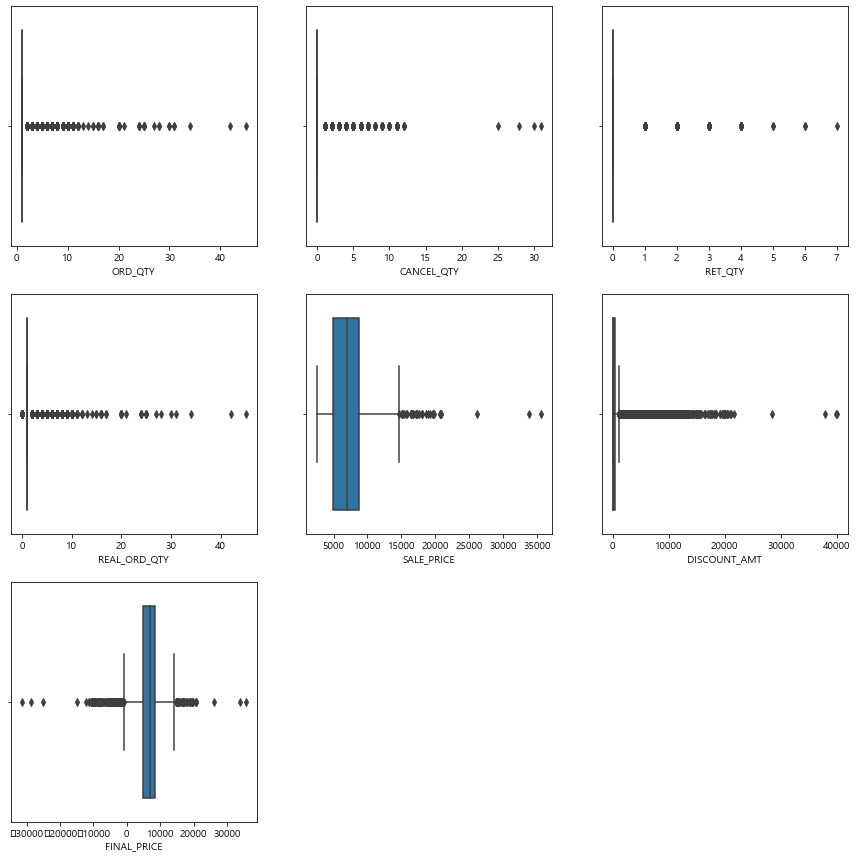

In [184]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='ORD_QTY',  orient = "v", data=copy_data)

plt.subplot(3,3,2)
sns.boxplot(x='CANCEL_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,3)
sns.boxplot(x='RET_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,4)
sns.boxplot(x='REAL_ORD_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,5)
sns.boxplot(x='SALE_PRICE', orient = "v", data=copy_data)

plt.subplot(3,3,6)
sns.boxplot(x='DISCOUNT_AMT', orient = "v", data=copy_data)

plt.subplot(3,3,7)
sns.boxplot(x='FINAL_PRICE', orient = "v", data=copy_data)

In [463]:
def outlier(df,col):
    q1 = df[col].quantile(0.25) # 1사분위
    q3 = df[col].quantile(0.75) # 3사분위 
    iqr = q3 - q1               # iqr 수치

    df.loc[(df[col] > (q3 + 1.5 * iqr)) | (df[col] < (q1 - 1.5 * iqr)), col] = df[col].median() # 이상치를 중앙값으로 대체

ol_col = ['ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY', 'SALE_PRICE', 'FINAL_PRICE']

for i in ol_col:
    #print(i)
    outlier(copy_data, i)

c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-package

<AxesSubplot:xlabel='FINAL_PRICE'>

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


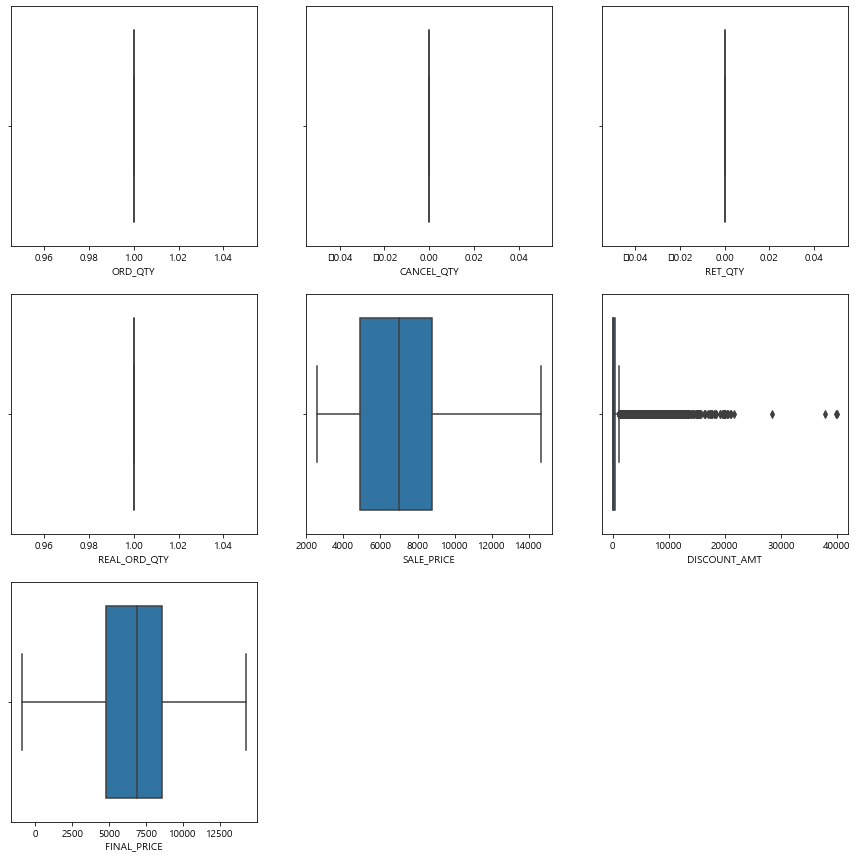

In [398]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='ORD_QTY',  orient = "v", data=copy_data)

plt.subplot(3,3,2)
sns.boxplot(x='CANCEL_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,3)
sns.boxplot(x='RET_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,4)
sns.boxplot(x='REAL_ORD_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,5)
sns.boxplot(x='SALE_PRICE', orient = "v", data=copy_data)

plt.subplot(3,3,6)
sns.boxplot(x='DISCOUNT_AMT', orient = "v", data=copy_data)

plt.subplot(3,3,7)
sns.boxplot(x='FINAL_PRICE', orient = "v", data=copy_data)


### 1.8 가변수화

In [192]:
# 가변수화가 필요한 데이터들을 확인한다.

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724702 entries, 166288 to 237568
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   H_YMD                724702 non-null  datetime64[ns]
 1   PKG_GOODS_NM         724702 non-null  object        
 2   GOODS_NM             724702 non-null  object        
 3   STD_GSGR_NO_LEV1_NM  724702 non-null  object        
 4   ORD_QTY              724702 non-null  int64         
 5   CANCEL_QTY           724702 non-null  int64         
 6   RET_QTY              724702 non-null  int64         
 7   REAL_ORD_QTY         724702 non-null  int64         
 8   SALE_PRICE           724702 non-null  int64         
 9   DISCOUNT_AMT         724702 non-null  float64       
 10  FINAL_PRICE          724702 non-null  int64         
 11  COMMNET_CNT          724702 non-null  int64         
 12  SALE_PERCETANGE      724702 non-null  float64       
 13  year     

In [464]:
cols = ['PKG_GOODS_NM', 'GOODS_NM', 'STD_GSGR_NO_LEV1_NM']

copy_data= pd.get_dummies(copy_data, columns = cols, drop_first=False)

In [465]:
copy_data.head()

,H_YMD,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,...,GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g),STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
166288,2020-01-01,1,0,0,1,8600,1408.0,7192,16.372093,2020,...,0,0,0,1,0,0,0,0,1,0
37753,2020-01-01,1,0,0,1,6300,0.0,6300,0.000000,2020,...,0,0,0,0,0,0,0,0,0,1
162585,2020-01-01,1,0,0,1,3300,486.0,2814,14.727273,2020,...,0,0,0,0,0,0,0,0,0,1
164041,2020-01-01,1,0,0,1,6900,264.0,6636,3.826087,2020,...,0,0,0,0,0,0,0,0,1,0
164040,2020-01-01,1,0,0,1,6900,317.0,6583,4.594203,2020,...,0,0,0,0,0,0,0,0,1,0


### 1.9 데이터를 타겟에 맞게 변형

In [466]:
# 데이터를 주 단위로 groupby 하고 해당 주에 팔린 상품의 개수를 sum()한다.

resampled = copy_data.resample(rule='1D', on='H_YMD')
resampled.sum()

copy_data = resampled.sum()

In [429]:
copy_data.columns

Index(['ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY', 'SALE_PRICE',
       'DISCOUNT_AMT', 'FINAL_PRICE', 'SALE_PERCETANGE', 'PKG_GOODS_NM_단품',
       'PKG_GOODS_NM_세트', 'GOODS_NM_[심방골주부X더반찬] 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_건표고버섯볶음',
       'GOODS_NM_고구마 품은 라자냐(450g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)', 'STD_GSGR_NO_LEV1_NM_국',
       'STD_GSGR_NO_LEV1_NM_메인요리', 'STD_GSGR_NO_LEV1_NM_반찬', 'year_2020',
       'year_2021', 'year_2022', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_

In [248]:
copy_data.to_csv('C:\\Users\\user\\Desktop\\raw.csv', index=False, encoding='utf-8-sig')

In [448]:
merge=pd.merge(copy_data, weather, how='inner', on='H_YMD')

In [449]:
merge

,H_YMD,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,...,GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g),STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬,Unnamed: 0,temp,rain,humid
0,2020-01-01,1,0,0,1,8600,1408.0,7192,16.372093,2020,...,0,0,0,0,1,0,9385,-2.2,0.0,79.3
1,2020-01-01,1,0,0,1,8600,1408.0,7192,16.372093,2020,...,0,0,0,0,1,0,9505,0.3,0.0,45.4
2,2020-01-01,1,0,0,1,8600,1408.0,7192,16.372093,2020,...,0,0,0,0,1,0,9625,-0.9,0.0,56.7
3,2020-01-01,1,0,0,1,8600,1408.0,7192,16.372093,2020,...,0,0,0,0,1,0,9745,-0.3,0.0,58.0
4,2020-01-01,1,0,0,1,8600,1408.0,7192,16.372093,2020,...,0,0,0,0,1,0,9865,0.2,0.0,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196887,2022-05-31,1,0,0,1,8900,713.0,8187,8.011236,2022,...,0,0,0,0,0,1,14922,20.6,0.0,52.5
12196888,2022-05-31,1,0,0,1,8900,713.0,8187,8.011236,2022,...,0,0,0,0,0,1,14923,20.9,0.0,59.9
12196889,2022-05-31,1,0,0,1,8900,713.0,8187,8.011236,2022,...,0,0,0,0,0,1,14924,19.0,0.0,53.5
12196890,2022-05-31,1,0,0,1,8900,713.0,8187,8.011236,2022,...,0,0,0,0,0,1,14925,22.1,0.0,38.9


## 2. 데이터 분할

### 2.0 컬럼명 전처리

In [467]:
# 데이터의 컬럼에 '['나 ','같은 특수기호가 들어가 있으면 학습이 안되기 때문에 제거해준다.
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

copy_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in copy_data.columns.values]

### 2.1 train/val, test 데이터 나누기

In [470]:
# 만들어진 데이터 기준 121행부터 2022년 5월의 데이터이므로 2022년 5월 이후 데이터를 test 데이터로 사용한다
# 104: 2022 전체 데이터
# 121: 2022.05 데이터

# train_data = copy_data[:104]
# test_data = copy_data[104:]

# train_data = copy_data[:121]
# test_data = copy_data[121:]

train_data = copy_data[:-31]
test_data = copy_data[-31:]

test_data.head()

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,...,GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g),STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,,,,,,
2022-05-01,0,0,0,0,0,0.0,0,0.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-02,1138,0,0,1138,8018400,820060.0,7198340,11229.558757,2301036,5690,...,52.0,70.0,0.0,126.0,15.0,93.0,50.0,33.0,338.0,767.0
2022-05-03,884,0,0,884,6330800,452701.0,5878099,5859.831790,1787448,4420,...,22.0,45.0,0.0,100.0,22.0,76.0,52.0,36.0,280.0,568.0
2022-05-04,1088,0,0,1088,7733300,489668.0,7243632,6890.301874,2199936,5440,...,26.0,64.0,0.0,150.0,24.0,75.0,51.0,34.0,375.0,679.0
2022-05-05,529,0,0,529,3754750,339780.0,3414970,4843.365530,1069638,2645,...,18.0,20.0,0.0,69.0,11.0,28.0,15.0,15.0,160.0,354.0


### 2.2 Target 데이터 설정

In [471]:
# 타겟이 되는 20개 제품을 설정한다

target = ['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']

print(len(target)) # // 20

# 학습&검증 데이터와 테스트 데이터를 나눈다.
# X, y -> 학습 및 검증데이터
# X_test, y_test -> 테스트데이터 
X, X_test = train_data.drop(target, axis=1), test_data.drop(target, axis=1)
y, y_test = train_data[target], test_data[target]

20


In [472]:
y_test.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-02,33.0,34.0,23.0,55.0,10.0,48.0,48.0,208.0,0.0,88.0,75.0,47.0,63.0,52.0,70.0,0.0,126.0,15.0,93.0,50.0
2022-05-03,36.0,31.0,16.0,40.0,11.0,41.0,35.0,154.0,0.0,71.0,40.0,31.0,61.0,22.0,45.0,0.0,100.0,22.0,76.0,52.0
2022-05-04,34.0,31.0,22.0,49.0,14.0,65.0,46.0,183.0,0.0,69.0,76.0,39.0,70.0,26.0,64.0,0.0,150.0,24.0,75.0,51.0
2022-05-05,15.0,20.0,21.0,28.0,9.0,27.0,18.0,123.0,0.0,39.0,21.0,22.0,25.0,18.0,20.0,0.0,69.0,11.0,28.0,15.0


### 2.3 Target / Validation data 분할

In [473]:
# train_test_split 메서드를 사용하여 학습 검증 데이터를 7:3비율로 나눈다

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, shuffle=False, random_state = 2022)

In [474]:
# 학습데이터 모양 확인
X_train.shape

(595, 16)

### 2.4 스케일링

In [475]:
# 범위가 제각각인 각 컬럼들을 0~1 사이에 범위로 조정해준다.

from sklearn.preprocessing import MinMaxScaler
col_x = list(X)
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

## 3. 모델링

### 3.0 모델 라이브러리 임포트

In [476]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance

%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 3.1 모델 선언 및 학습

In [312]:
y_test.shape

(31, 20)

In [313]:
X_train

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day,PKG_GOODS_NM_단품,PKG_GOODS_NM_세트,STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,
2020-01-01,325,0,0,325,2268700,90476.0,2178224,1284.546126,656500,325,325,325.0,0.0,0.0,188.0,137.0
2020-01-02,507,0,0,507,3461000,137145.0,3323855,2015.121625,1024140,507,1014,507.0,0.0,0.0,281.0,226.0
2020-01-03,653,0,0,653,4586400,91408.0,4494992,1336.728764,1319060,653,1959,653.0,0.0,0.0,346.0,307.0
2020-01-04,722,0,0,722,4960200,126515.0,4833685,1822.520913,1458440,722,2888,718.0,4.0,0.0,335.0,387.0
2020-01-05,0,0,0,0,0,0.0,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-13,1246,0,0,1246,9531160,657224.0,8873936,7436.660359,2518166,9968,16198,1176.0,70.0,0.0,683.0,563.0
2021-08-14,698,0,0,698,5292700,424389.0,4868311,4709.816065,1410658,5584,9772,642.0,56.0,0.0,371.0,327.0
2021-08-15,0,0,0,0,0,0.0,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0


In [477]:
xgb_model = XGBRegressor(
    booster='gblinear',
    n_estimators=1200, 
    learning_rate=0.1, 
    gamma=1, 
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=5
    )

In [478]:
xgb_model.fit(
    X_train_s,
    y_train, 
    eval_metric="rmse",
    eval_set=[(X_train_s, y_train), (X_val_s, y_val)], 
    early_stopping_rounds=20
    )

[14:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:35.27660	validation_1-rmse:33.49807
[1]	validation_0-rmse:30.09510	validation_1-rmse:30.04548
[2]	validation_0-rmse:29.22144	validation_1-rmse:30.18891
[3]	validation_0-rmse:28.81096	validation_1-rmse:30.32468
[4]	validation_0-rmse:28.49322	validation_1-rmse:30.36171
[5]	validation_0-rmse:28.22819	validation_1-rmse:30.37537


c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:28.00810	validation_1-rmse:30.34397
[7]	validation_0-rmse:27.82157	validation_1-rmse:30.32607
[8]	validation_0-rmse:27.66250	validation_1-rmse:30.33512
[9]	validation_0-rmse:27.52580	validation_1-rmse:30.31499
[10]	validation_0-rmse:27.40759	validation_1-rmse:30.30786
[11]	validation_0-rmse:27.30298	validation_1-rmse:30.28521
[12]	validation_0-rmse:27.20993	validation_1-rmse:30.27469
[13]	validation_0-rmse:27.12643	validation_1-rmse:30.26052
[14]	validation_0-rmse:27.05066	validation_1-rmse:30.23991
[15]	validation_0-rmse:26.98045	validation_1-rmse:30.25051
[16]	validation_0-rmse:26.91603	validation_1-rmse:30.22256
[17]	validation_0-rmse:26.85577	validation_1-rmse:30.21502
[18]	validation_0-rmse:26.79924	validation_1-rmse:30.17110
[19]	validation_0-rmse:26.74552	validation_1-rmse:30.13925
[20]	validation_0-rmse:26.69389	validation_1-rmse:30.13296
[21]	validation_0-rmse:26.64474	validation_1-rmse:30.12487


XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1200, n_jobs=0, num_parallel_tree=None,
             predictor=None, random_state=0, reg_alpha=0, reg_lambda=0, ...)

In [479]:
xgb_pred = xgb_model.predict(X_val_s)

xgb_pred

array([[32.842266, 54.06958 , 49.27967 , ..., 39.75394 , 70.496086,
        60.450405],
       [25.606892, 43.852592, 39.762764, ..., 31.829994, 57.454697,
        46.85795 ],
       [31.857891, 44.505318, 40.962105, ..., 33.41693 , 58.912216,
        57.18291 ],
       ...,
       [25.52644 , 37.185215, 33.221493, ..., 26.03085 , 49.61758 ,
        48.573498],
       [37.66787 , 39.57723 , 36.228447, ..., 32.139053, 55.24682 ,
        67.28016 ],
       [32.85259 , 41.924015, 37.657112, ..., 31.331738, 55.926888,
        59.942932]], dtype=float32)

In [480]:
# 모델의 성능을 점검하는 지표로 r2와 RMSE를 사용한다.
# r2는 회귀모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지 가리키는 지표이기에 사용했다.
# 회귀 예측에 대한 정확도는 accuracy로 판단할 수 없기 때문에 rmse를 사용했다.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_val, xgb_pred)
RMSE = mean_squared_error(y_val, xgb_pred, squared=False)

print('r2: ', r2)
print('RMSE: ', RMSE)


r2:  -0.36104145120662795
RMSE:  25.04560103396647


In [481]:
# 테스트 데이터에 대해서 결과를 출력한다.

xgb_test_pred = xgb_model.predict(X_test_s)
df = y_test.copy()
#xgb_test_pred = pd.DataFrame(xgb_test_pred)
df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)', 'GOODS_NM_가정집 오징어불고기/셀프(380g)',
       'GOODS_NM_고사리나물볶음(150g)', 'GOODS_NM_건표고버섯볶음',
       'GOODS_NM_고구마 품은 라자냐(450g)', 'GOODS_NM_고소한도토리묵무침(360g)',
       'GOODS_NM_꼬막무침 (260g)', 'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)',
       'GOODS_NM_셀프두부조림(600g)', 'GOODS_NM_소고기유니짜장소스(1인분, 200g)',
       'GOODS_NM_수제계란말이(350g)', 'GOODS_NM_숙주나물(300g)',
       'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피', 'GOODS_NM_열무비빔밥재료믹스(2인분)',
       'GOODS_NM_옛날잡채(500g)', 'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = xgb_test_pred

xgb_test_pred = df.copy()
xgb_test_pred.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-01,-0.871864,6.041943,4.947033,3.463886,-1.149332,-0.147000,7.832499,22.316170,2.121350,10.193767,0.264082,6.023782,7.926831,0.238812,2.247826,0.858681,13.832109,-0.469214,7.997983,-1.711748
2022-05-02,30.573454,36.398537,34.070229,39.614983,31.078800,38.445370,47.452461,260.103485,37.253971,73.118988,-0.019449,53.076664,56.234509,20.136559,36.040981,26.930315,138.837097,26.927959,53.940918,55.692764
2022-05-03,17.833941,32.063644,28.906221,32.347527,22.555647,28.346031,46.102062,200.350082,22.835722,60.591255,0.033209,41.697811,47.909592,14.101813,28.428949,16.281412,123.761261,20.002497,43.943981,32.789795
2022-05-04,21.028683,38.062851,34.363899,38.623600,27.429352,34.841949,54.545013,242.676529,28.914518,71.493011,-0.018022,49.330704,56.688148,16.939276,34.426090,20.640991,152.016983,23.954914,51.735893,39.851265
2022-05-05,12.568071,21.290257,19.179893,21.036013,14.114719,17.588091,30.135708,130.556931,14.781494,40.743355,0.125689,27.992592,31.942118,9.259172,18.404724,10.206622,76.370605,12.892451,29.831640,22.109198


In [482]:
y_test.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-02,33.0,34.0,23.0,55.0,10.0,48.0,48.0,208.0,0.0,88.0,75.0,47.0,63.0,52.0,70.0,0.0,126.0,15.0,93.0,50.0
2022-05-03,36.0,31.0,16.0,40.0,11.0,41.0,35.0,154.0,0.0,71.0,40.0,31.0,61.0,22.0,45.0,0.0,100.0,22.0,76.0,52.0
2022-05-04,34.0,31.0,22.0,49.0,14.0,65.0,46.0,183.0,0.0,69.0,76.0,39.0,70.0,26.0,64.0,0.0,150.0,24.0,75.0,51.0
2022-05-05,15.0,20.0,21.0,28.0,9.0,27.0,18.0,123.0,0.0,39.0,21.0,22.0,25.0,18.0,20.0,0.0,69.0,11.0,28.0,15.0


In [483]:
# 모델의 성능을 점검하는 지표로 r2와 RMSE를 사용한다.
# r2는 회귀모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지 가리키는 지표이기에 사용했다.
# 회귀 예측에 대한 정확도는 accuracy로 판단할 수 없기 때문에 rmse를 사용했다.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, xgb_test_pred)
RMSE = mean_squared_error(y_test, xgb_test_pred, squared=False)

print('r2: ', r2)
print('RMSE: ', RMSE)

r2:  0.14168959715156615
RMSE:  23.868565058230736


In [484]:
# 그래프 한글깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [485]:
xlabel =['돼지짜글이',
       '오징어불고기', '건고사리나물볶음',
       '건표고버섯볶음', '고구마 라자냐',
       '고소한도토리묵무침', '꼬막무침',
       '두메산나물비빔밥재료', '메밀소바', '셀프두부조림',
       '소고기유니짜장소스', '수제계란말이',
       '숙주나물', '순살코다리강정', '양장피',
       '열무비빔밥재료', '옛날잡채',
       '우삼겹숙주볶음', '채소계란찜',
       '한돈 제육볶음'] 

C:\Users\user\AppData\Local\Temp\ipykernel_10156\3540726441.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabel, rotation=45, size=8)


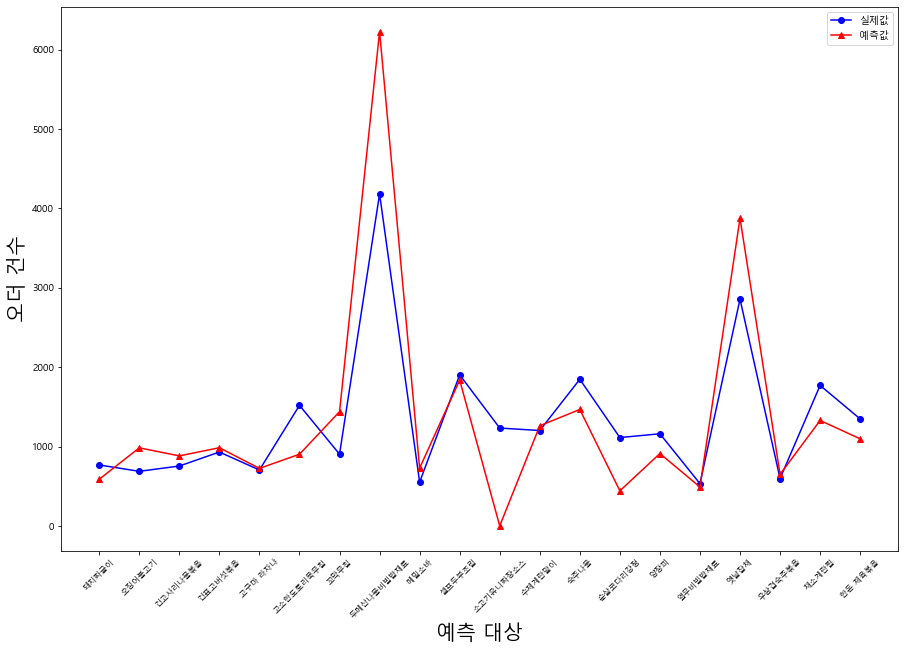

In [486]:
fig = plt.figure(figsize=(15,10))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test.sum(), marker='o', color='blue', label='실제값')
chart.plot(xgb_test_pred.sum(), marker='^', color='red', label='예측값')
chart.set_xticklabels(xlabel, rotation=45, size=8)
plt.xlabel('예측 대상', size=20)
plt.ylabel('오더 건수', size=20)
plt.legend(loc='best')

In [487]:
def evaluate_regr(y, pred):
    mse = mean_squared_error(y, pred)
    rmse_val = np.sqrt(mse)
    mae_val = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

# 여러 모델의 성능 확인 함수 
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
#--------------------------------------------------------------------
#모델별로 평가 확인 

ridge_reg = Ridge(alpha=0.5)      # best alpha = 0.5
lasso_reg = Lasso(alpha=1)        # best alpha = 1
en_reg = ElasticNet(alpha=1)
tree_reg = DecisionTreeRegressor(random_state=13)
forest_reg = RandomForestRegressor(n_estimators=100,random_state=13)

for model in [ridge_reg, lasso_reg, en_reg, tree_reg, forest_reg]:
# for model in [forest_reg]:
    get_model_predict(model, X_train, X_val, y_train, y_val)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.45781e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+05, tolerance: 9.041e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.025e+04, tolerance: 2.889e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

### Ridge ###
RMSE : 235.06564 | MAE : 114.22682 | r2 : -94.81827 
### Lasso ###
RMSE : 37.27247 | MAE : 21.81423 | r2 : -0.94939 


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+05, tolerance: 1.088e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+04, tolerance: 4.969e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 

### ElasticNet ###
RMSE : 37.28574 | MAE : 21.82192 | r2 : -0.94817 
### DecisionTreeRegressor ###
RMSE : 38.27101 | MAE : 21.49766 | r2 : -3.15776 
### RandomForestRegressor ###
RMSE : 31.54362 | MAE : 17.65638 | r2 : -1.75666 


In [339]:
pd.DataFrame([X_train.columns , en_reg.coef_[0]]).T

,0,1
0,ORD_QTY,0.034318
1,CANCEL_QTY,0.0
2,RET_QTY,0.0
3,REAL_ORD_QTY,0.000107
4,SALE_PRICE,0.000059
5,DISCOUNT_AMT,0.000317
6,FINAL_PRICE,-0.000046
7,SALE_PERCETANGE,-0.025117
8,year,-0.000066
9,month,0.000493


### 3.2 모델 하이퍼파라미터 튜닝

In [488]:
from sklearn.model_selection import GridSearchCV

# 1. Ridge - alpha값이 클수록(penalty 증가) 계수의 크기가 줄어듬
# 영향력이 큰 계수의 영향력을 줄임 / 변수를 축소, 다중공선성을 방지
param_grid = [
    {'alpha': [0, 0.05, 0.1, 0.5, 1, 5]},
]

ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
ridge_grid_search.fit(X_train_s, y_train)

print('best_params_: ', ridge_grid_search.best_params_)

cvres = ridge_grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)
    
# best_params_:  {'alpha': 0.1}, 그러나 alpha 값에 따른 score 변동 거의 없음.

best_params_:  {'alpha': 0}
-40.902638653389495 {'alpha': 0}
-364.84552045136337 {'alpha': 0.05}
-403.0430761302065 {'alpha': 0.1}
-551.4054088754813 {'alpha': 0.5}
-621.8518242738579 {'alpha': 1}
-815.064553705914 {'alpha': 5}


In [489]:
# 2. Lasso - alpha 조금만 키워도 계수가 완전히 0이 되는 변수 증가 
# feaure selection, 중요한 변수만 택함
param_grid = [
    {'alpha': [0, 0.05, 0.1, 0.5, 1]},
    ]

lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                          scoring='r2',
                          return_train_score=True)
lasso_grid_search.fit(X_train, y_train)

print ('best_params_: ', lasso_grid_search.best_params_)

cvres = lasso_grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)  
# best_params_:  {'alpha': 0} : 이 데이터로는 Lasso는 하지 않는 것이 바람직.
# alpha 값 감소에 따라 mean_test_score 급격히 감소

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+05, tolerance: 8.644e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_

best_params_:  {'alpha': 1}
-213.27813436928741 {'alpha': 0}
-213.27118599002637 {'alpha': 0.05}
-213.26424162507368 {'alpha': 0.1}
-213.20898604594768 {'alpha': 0.5}
-213.14032431096763 {'alpha': 1}


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.704e+04, tolerance: 1.381e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.970e+04, tolerance: 3.978e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+05, tolerance: 

In [342]:
# 3. Randomforest - 가장 복잡한 모델로, 예측 성능은 좋으나 모델이 복잡하고, 가역성이 좋지않음.
param_grid = [
    {'n_estimators': [30, 50, 70, 100], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2,3,4] }
    ]

forest_reg = RandomForestRegressor(random_state=13)
rf_grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
rf_grid_search.fit(X_train, y_train)

print ('best_params_: ', rf_grid_search.best_params_)
# best_params_: {'max_features': 8, 'n_estimators': 100}

best_params_:  {'max_features': 4, 'n_estimators': 100}


### 3.3 k-fold 교차검증

In [344]:
from sklearn.model_selection import cross_val_score

In [345]:
def display_socres(model):
    scores = cross_val_score(model, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=5)
    model_rmse_scores = np.sqrt(-scores)
    print('###', model.__class__.__name__, '###')
    print("점수:", model_rmse_scores)
    print("평균:", model_rmse_scores.mean())
    print("표준편차:", model_rmse_scores.std())


for model in [ridge_reg, lasso_reg, tree_reg, forest_reg]:
    display_socres(model)

### Ridge ###
점수: [19.76590634 13.37897381 15.30266163 30.97679298 14.24790581]
평균: 18.734448111599917
표준편차: 6.504248445773412


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.500e+01, tolerance: 5.098e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+02, tolerance: 4.371e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.544e+02, tolerance: 

### Lasso ###
점수: [22.61621454 12.90611449 14.51834441 30.35426099 13.30477365]
평균: 18.739941618020985
표준편차: 6.8016818363291796
### DecisionTreeRegressor ###
점수: [21.4292857  15.71649876 17.6295207  34.47946249 23.16588728]
평균: 22.48413098486595
표준편차: 6.554899770267142
### RandomForestRegressor ###
점수: [18.92762194 14.4283555  12.90710428 31.96319164 16.19417038]
평균: 18.884088746905636
표준편차: 6.83927467847018


In [55]:
R2 = []

def display_socres(model):
    scores = cross_val_score(model, X_test, y_test,
                             scoring="r2", cv=5)
    model_rmse_scores = np.sqrt(-scores)
    print('###', model.__class__.__name__, '###')
    print("점수:", model_rmse_scores)
    print("평균:", model_rmse_scores.mean())
    print("표준편차:", model_rmse_scores.std())


for model in [ridge_reg, lasso_reg, tree_reg, forest_reg]:
    display_socres(model)

c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

### Ridge ###
점수: [29.6025605        nan        nan        nan        nan]
평균: nan
표준편차: nan
### Lasso ###
점수: [9.88199838        nan        nan        nan        nan]
평균: nan
표준편차: nan
### DecisionTreeRegressor ###
점수: [6.69793278        nan        nan        nan        nan]
평균: nan
표준편차: nan


c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

### RandomForestRegressor ###
점수: [5.18719051        nan        nan        nan        nan]
평균: nan
표준편차: nan


c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### 3.5 Test data 확인

In [161]:
y_test.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-08,117.079529,443.753387,289.190674,273.632446,113.341621,226.346893,577.739929,1019.421143,91.517235,573.306213,32.566288,434.569275,398.142303,160.843964,206.819611,196.089874,622.418274,181.906952,413.975677,283.378662
2022-05-15,129.003983,439.674072,322.822235,319.736755,120.675552,276.592804,577.362122,941.227966,108.846497,629.806335,28.582481,450.000763,474.128021,174.374771,193.932617,208.935684,617.234192,207.146835,447.663422,262.877258
2022-05-22,90.961327,410.684296,281.477631,269.530243,95.045937,237.611053,551.627197,816.825562,70.697929,566.473877,-3.213213,400.708160,409.677612,137.036377,174.266006,163.114410,605.447144,177.747711,386.426025,242.915283
2022-05-29,110.905624,391.216003,288.009338,273.577820,116.387978,257.851410,517.738464,626.707520,94.547836,545.195557,-12.622774,371.142273,409.479156,134.894730,177.251022,163.080490,621.065308,186.907791,351.616669,257.025452
2022-06-05,30.174109,106.817978,84.218506,80.277481,37.121563,77.706673,147.756577,183.147812,29.043568,159.341202,-7.161743,105.407333,120.925575,37.088886,53.184841,41.770962,208.497131,54.824734,100.267868,62.017426


In [490]:
# # 테스트 데이터에 대해서 결과를 출력한다.

# lasso_test_pred = xgb_model.predict(X_test)

# lasso_test_pred = pd.DataFrame(lasso_test_pred)

# lasso_test_pred.columns = ['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)', 'GOODS_NM_가정집 오징어불고기/셀프(380g)',
#        'GOODS_NM_고사리나물볶음(150g)', 'GOODS_NM_건표고버섯볶음',
#        'GOODS_NM_고구마 품은 라자냐(450g)', 'GOODS_NM_고소한도토리묵무침(360g)',
#        'GOODS_NM_꼬막무침 (260g)', 'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)',
#        'GOODS_NM_셀프두부조림(600g)', 'GOODS_NM_소고기유니짜장소스(1인분, 200g)',
#        'GOODS_NM_수제계란말이(350g)', 'GOODS_NM_숙주나물(300g)',
#        'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피', 'GOODS_NM_열무비빔밥재료믹스(2인분)',
#        'GOODS_NM_옛날잡채(500g)', 'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
#        'GOODS_NM_한돈 제육볶음(700g)']

# lasso_test_pred.insert(0, 'H_YMD', pd.DataFrame(H_YMD)[-31:])

# 테스트 데이터에 대해서 결과를 출력한다.

lasso_test_pred = xgb_model.predict(X_test)
df = y_test.copy()

df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)', 'GOODS_NM_가정집 오징어불고기/셀프(380g)',
       'GOODS_NM_고사리나물볶음(150g)', 'GOODS_NM_건표고버섯볶음',
       'GOODS_NM_고구마 품은 라자냐(450g)', 'GOODS_NM_고소한도토리묵무침(360g)',
       'GOODS_NM_꼬막무침 (260g)', 'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)',
       'GOODS_NM_셀프두부조림(600g)', 'GOODS_NM_소고기유니짜장소스(1인분, 200g)',
       'GOODS_NM_수제계란말이(350g)', 'GOODS_NM_숙주나물(300g)',
       'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피', 'GOODS_NM_열무비빔밥재료믹스(2인분)',
       'GOODS_NM_옛날잡채(500g)', 'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = lasso_test_pred

lasso_test_pred = df.copy()
lasso_test_pred.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-01,-8.718642e-01,6.041943e+00,4.947033e+00,3.463886e+00,-1.149332e+00,-1.470003e-01,7.832499e+00,2.231617e+01,2.121350e+00,1.019377e+01,0.264082,6.023782e+00,7.926831e+00,2.388122e-01,2.247826e+00,8.586807e-01,1.383211e+01,-4.692144e-01,7.997983e+00,-1.711748e+00
2022-05-02,1.729088e+08,1.114499e+08,1.022101e+08,1.083286e+08,1.363968e+08,1.086822e+08,1.619494e+08,7.383485e+08,2.262659e+07,2.112354e+08,-976776.437500,1.286921e+08,1.651730e+08,9.324556e+07,1.756620e+08,2.648339e+07,6.587722e+08,6.439513e+07,1.285972e+08,2.601568e+08
2022-05-03,1.256052e+08,9.234000e+07,8.334145e+07,8.699786e+07,1.051139e+08,8.470142e+07,1.377021e+08,5.847176e+08,1.358250e+07,1.699104e+08,-792485.250000,1.014266e+08,1.345630e+08,7.118216e+07,1.386597e+08,1.773801e+07,5.421676e+08,4.923474e+07,1.030738e+08,1.901444e+08
2022-05-04,1.499180e+08,1.144034e+08,1.028270e+08,1.069252e+08,1.276768e+08,1.032452e+08,1.717301e+08,7.158774e+08,1.522421e+07,2.088920e+08,-976320.625000,1.240245e+08,1.659921e+08,8.622542e+07,1.695394e+08,2.064986e+07,6.703131e+08,5.971434e+07,1.266179e+08,2.273908e+08
2022-05-05,7.849663e+07,5.317205e+07,4.845777e+07,5.105598e+07,6.329175e+07,5.064722e+07,7.807231e+07,3.461401e+08,9.627115e+06,9.961530e+07,-462181.531250,6.021426e+07,7.828364e+07,4.311086e+07,8.225518e+07,1.167690e+07,3.134859e+08,2.979852e+07,6.055992e+07,1.183754e+08


In [491]:
y_test.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-02,33.0,34.0,23.0,55.0,10.0,48.0,48.0,208.0,0.0,88.0,75.0,47.0,63.0,52.0,70.0,0.0,126.0,15.0,93.0,50.0
2022-05-03,36.0,31.0,16.0,40.0,11.0,41.0,35.0,154.0,0.0,71.0,40.0,31.0,61.0,22.0,45.0,0.0,100.0,22.0,76.0,52.0
2022-05-04,34.0,31.0,22.0,49.0,14.0,65.0,46.0,183.0,0.0,69.0,76.0,39.0,70.0,26.0,64.0,0.0,150.0,24.0,75.0,51.0
2022-05-05,15.0,20.0,21.0,28.0,9.0,27.0,18.0,123.0,0.0,39.0,21.0,22.0,25.0,18.0,20.0,0.0,69.0,11.0,28.0,15.0


In [492]:
ridge_test_pred = ridge_reg.predict(X_test_s)
df = y_test.copy()

df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = ridge_test_pred

ridge_test_pred = df.copy()
ridge_test_pred.head()

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-05-01,2.313303,-1.872730,-0.102796,-0.124465,-1.091704,-2.597155,-2.560035,-1.504407,2.075597,2.045237,0.0,1.432340,1.934364,0.223512,-0.246525,1.531946,-2.854962,-1.918397,2.008625,1.309136
2022-05-02,-23.424669,46.066353,20.104827,-37.113362,-47.048906,-49.610921,67.673815,8.275326,23.622403,15.083747,0.0,-1.083842,5.308375,-28.587244,-3.124752,-6.183505,94.686311,-45.867600,14.882113,-53.017047
2022-05-03,-17.345614,34.759689,15.338928,-28.388018,-36.211243,-38.526365,51.120404,5.978359,18.528098,12.008106,0.0,-0.495458,4.511667,-21.793582,-2.444393,-4.377702,71.697045,-35.502761,11.841880,-40.208612
2022-05-04,-21.945416,43.325275,18.949552,-34.997718,-44.428067,-46.929482,63.671137,7.742738,22.380317,14.334839,0.0,-0.949897,5.111698,-26.944154,-2.958887,-5.757656,89.146132,-43.361289,14.138509,-49.922701
2022-05-05,-9.479921,20.103829,9.160937,-17.080060,-22.157982,-24.150713,29.644824,2.978066,11.943441,8.023270,0.0,0.277330,3.481716,-12.983792,-1.564538,-2.014205,41.862820,-22.063295,7.908691,-23.595866


### 3.4 평가 시각화

In [493]:
# 모델의 성능을 점검하는 지표로 r2와 RMSE를 사용한다.
# r2는 회귀모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지 가리키는 지표이기에 사용했다.
# 회귀 예측에 대한 정확도는 accuracy로 판단할 수 없기 때문에 rmse를 사용했다.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lasso_r2 = r2_score(y_test, lasso_test_pred)
lasso_RMSE = mean_squared_error(y_test, lasso_test_pred, squared=False)

print('r2: ', lasso_r2)
print('RMSE: ', lasso_RMSE)

ridge_r2 = r2_score(y_test, ridge_test_pred)
ridge_RMSE = mean_squared_error(y_test, ridge_test_pred, squared=False)

print('r2: ', ridge_r2)
print('RMSE: ', ridge_RMSE)

r2:  -39504552421621.48
RMSE:  152204865.1628976
r2:  -5.792250852242641
RMSE:  55.505811450300016


C:\Users\user\AppData\Local\Temp\ipykernel_10156\2119176278.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabel, rotation=45, size=8)


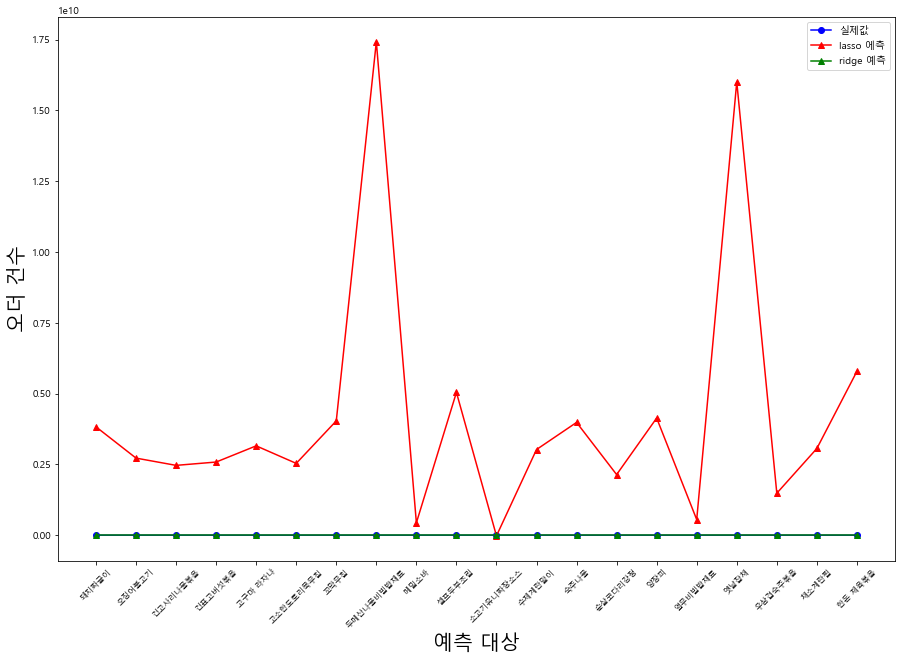

In [494]:
fig = plt.figure(figsize=(15,10))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test.sum(), marker='o', color='blue', label='실제값')
chart.plot(lasso_test_pred.sum(), marker='^', color='red', label='lasso 에측')
chart.plot(ridge_test_pred.sum(), marker='^', color='green', label='ridge 예측')
chart.set_xticklabels(xlabel, rotation=45, size=8)
plt.xlabel('예측 대상', size=20)
plt.ylabel('오더 건수', size=20)
plt.legend(loc='best')

### 3.6 모델 저장

In [138]:
import joblib

joblib.dump(lasso_reg, 'C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0708_lasso_model.pkl')
joblib.dump(ridge_reg, 'C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0708_ridge_model.pkl')

['C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0708_ridge_model.pkl']

In [3]:
import joblib
model = joblib.load('C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0707_xgb_model_ne1500.pkl')

In [ ]:
test_model = model.predict()